# Decision Tree Classifier

### Import library required
Library yang digunakan adalah **pandas, numpy, matplotlib, seaborn, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Load Data
Data yang digunakan adalah data bawaan sklearn library. Jika ingin menggunakan data sendiri silahkan pakai perintah `pd.read_csv()` atau `pd.read_excel()`

In [4]:
data = load_iris(as_frame=True)
X, y = data.data, data.target

data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Split Data
Fungsi `train_test_split`, secara default akan membagi data menjadi 75% data training dan 25% data test. Untuk mengaturnya dapat menggunakan argument `test_size` atau `train_size`. Contoh `train_test_split(X, y, train_test = 0.8)`

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, train_size=0.8)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  120  | Jumlah Test Data :  30


### Make Model

In [6]:
clf_entropy = DecisionTreeClassifier()
clf_entropy.fit(X_train, y_train)
clf_entropy.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Plot Tree

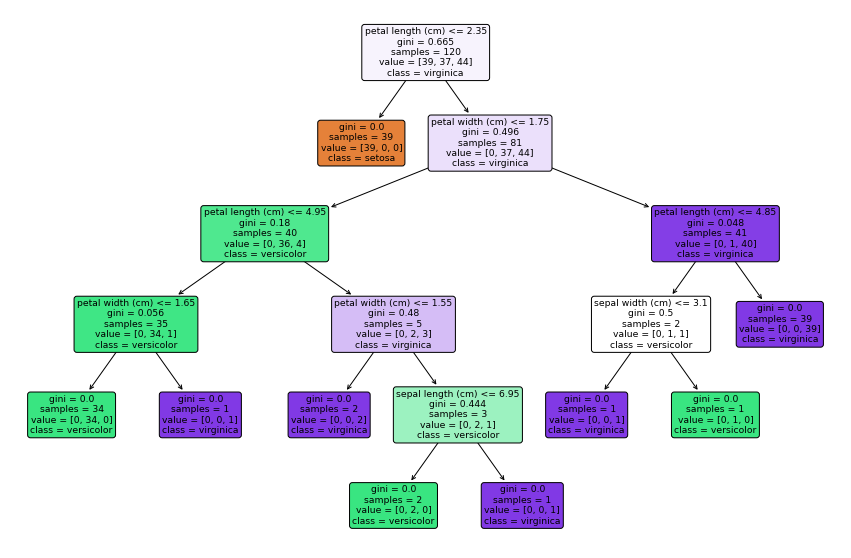

In [7]:
plt.figure(figsize=(15,10))
plot_tree(clf_entropy, filled=True, feature_names=data.feature_names,  
                     class_names=data.target_names, rounded=True);

### Tree visualization with the `graphviz` library
If you use the conda package manager, the graphviz binaries and the python package can be installed with `conda install python-graphviz`. Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with `pip install graphviz`.

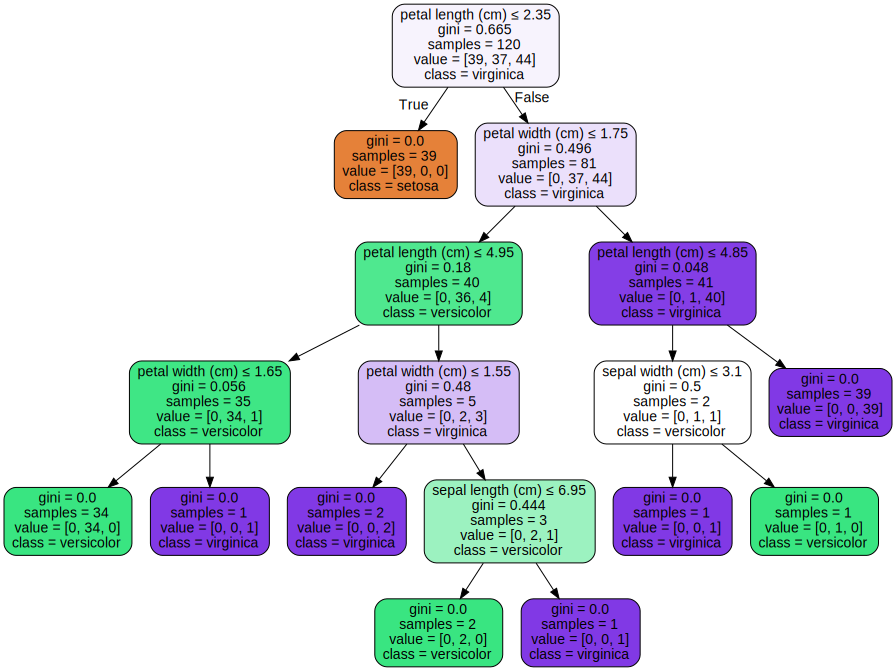

In [8]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(clf_entropy, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,
                     special_characters=True)

graph = graphviz.Source(dot_data)  
graph 

### Check Accuracy

In [9]:
y_pred = clf_entropy.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

Accuracy : 1.0


### Confusion Matrix

Text(0.5, 1.0, 'Accuracy : 1.0')

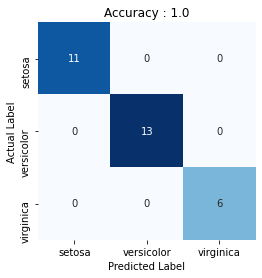

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, square=True, cmap='Blues', xticklabels=data.target_names,
           yticklabels=data.target_names, cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Accuracy : {:.3}'.format(accuracy))

### Classsification Report

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Make Prediction
Misalnya kita memiliki bunga dengan sepal_length = 0.4, sepal_width = 1, petal_length = 2.3, dan petal_width = 2.5

In [37]:
predict = clf_entropy.predict([[0.4,1,2.3,2.5]])
data.target_names[predict][0]

'virginica'